# sql_magic API

## Load extension

In [1]:
%load_ext sql_magic

## Use sql_magic with a psycopg2 connection

In [2]:
import pandas.io.sql as psql
import psycopg2
connect_credentials = {'database': 'postgres',
                       'host': 'localhost',
                       'password': '',
                       'user': 'postgres'}

# connect to postgres connection object
conn = psycopg2.connect(**connect_credentials)
conn.autocommit = True
schema_name = 'template'
psql.execute('SET search_path TO {}'.format(schema_name), conn)

<cursor object at 0x10f46a520; closed: 0>

In [3]:
%config SQL.conn_name='conn'

In [4]:
%%read_sql
SELECT version()

Query started at 06:46:56 PM EDT; Query executed in 0.00 m

,version
0,"PostgreSQL 9.6.1 on x86_64-apple-darwin14.5.0,..."


### Assign result to pandas dataframe and plot

In [5]:
%%read_sql df
SELECT generate_series(1,10,1) s

Query started at 06:46:56 PM EDT; Query executed in 0.00 m

,s
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


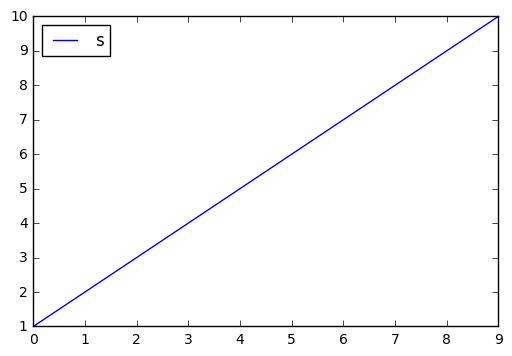

In [6]:
%matplotlib inline
df.plot()

### Utilize Python variables in SQL query

In [7]:
lower, upper = 9,15

In [8]:
%%read_sql df
SELECT *
FROM (SELECT generate_series(1,20,2) s) f
WHERE s BETWEEN {lower} and {upper}

Query started at 06:46:56 PM EDT; Query executed in 0.00 m

,s
0,9
1,11
2,13
3,15


## Connect to Spark engine

In [9]:
%config SQL.conn_name='spark'

In [10]:
%%read_sql
SELECT 1

Query started at 06:46:56 PM EDT; Query executed in 0.04 m

,1
0,1


## Connect to postgres simulaneously

In [11]:
%%read_sql -c conn
SELECT version()

Query started at 06:46:58 PM EDT; Query executed in 0.00 m

,version
0,"PostgreSQL 9.6.1 on x86_64-apple-darwin14.5.0,..."


## Use sql_magic with a SQLAlchemy Engine

In [12]:
# sqllite conn
from sqlalchemy import create_engine
from sqlite3 import dbapi2 as sqlite
sqllite_engine = create_engine('sqlite+pysqlite:///test.db', module=sqlite)

In [13]:
%config SQL.conn_name='sqllite_engine'

In [14]:
%%read_sql
SELECT sqlite_version();

Query started at 06:46:59 PM EDT; Query executed in 0.00 m

,sqlite_version()
0,3.13.0


## Miscelleanous results

In [15]:
%%read_sql
DROP TABLE IF EXISTS example_table;
CREATE TEMP TABLE example_table
AS
SELECT 1;

Query started at 06:46:59 PM EDT; Query executed in 0.00 m

In [16]:
%%read_sql
SELECT 1

Query started at 06:46:59 PM EDT; Query executed in 0.00 m

,1
0,1


## Asynchronous calls
Queries can be run in async mode using the --async (or -a) flag. Displaying results from async calls are disabled by default.

In [17]:
%%read_sql df -a
SELECT 'long query here'

Query started at 06:46:59 PM EDT; Query executed in 0.00 m

# Configuration

## Flags
Notifications and auto-display can be temporarily disabled with flags:
<pre>
positional arguments:
  table_name

optional arguments:
  -h, --help     show this help message and exit
  -n, --notify   Toggle option for notifying query result
  -a, --async    Run query in seperate thread. Please be cautious when
                 assigning result to a variable
  -d, --display  Toggle option for outputing query result
</pre>
  

In [18]:
%%read_sql
SELECT 1

Query started at 06:46:59 PM EDT; Query executed in 0.00 m

,1
0,1


In [19]:
%%read_sql -d
SELECT 1

Query started at 06:46:59 PM EDT; Query executed in 0.00 m

## Defaults
Notifications and displaying results are enabled by default, but can be turned off with %config magic

In [20]:
# alerts and display are automatically enabled
%config SQL

SQL options
---------
SQL.conn_name=<Unicode>
    Current: 'sqllite_engine'
    Object name for accessing computing resource environment
SQL.notify_result=<Bool>
    Current: True
    Notify query result to stdout
SQL.output_result=<Bool>
    Current: True
    Output query result to stdout


In [21]:
%config SQL.output_result = False

In [22]:
%%read_sql
SELECT 1

Query started at 06:46:59 PM EDT; Query executed in 0.00 m